# **Hypothesis Validation**

## Objectives

This hypothesis analysis aims to explore critical climate relationships by testing three evidence-based assumptions. The primary objective is to evaluate whether these hypotheses hold true or can be rejected from a statistical standpoint using empirical data supported by visualisation. 
Specifically, the analysis investigates whether **higher renewable energy adoption and improved energy efficiency are associated with lower CO₂ emissions per capita**, and whether **a tipping point exists around 30% renewable energy share beyond which emission reductions accelerate**. These insights contribute to a clearer understanding of decarbonisation pathways and support data-informed climate policy decisions.



---

In [4]:
# import libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from scipy.stats import spearmanr

In [5]:
# load the dataset
df= pd.read_csv('../data/cleaned/enhanced_energy_features.csv')
df.head()

,country,year,elec_access_pct,clean_fuels_access_pct,renew_cap_kw_pc,climate_finance_usd,renewables_share_pct,fossil_elec_twh,nuclear_elec_twh,renew_elec_twh,...,region_miss,subregion_miss,co2_per_capita_t,log_co2_per_capita_t,log_renewables_share_pct,log_energy_intensity_mj_usd,log_gdp_pc_usd,above_30_pct,year_offset,renewables_3yr_avg
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,0,0,0.037754,0.037059,3.828424,0.970779,5.195324,1,0,44.990000
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,0,0,0.035988,0.035356,3.841601,1.007958,5.195324,1,1,45.295000
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,0,0,0.048180,0.047055,3.659193,0.875469,5.195324,1,2,42.806667
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,0,0,0.053666,0.052276,3.628599,0.875469,5.255847,1,3,40.030000
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,...,0,0,0.043717,0.042788,3.811982,0.788457,5.358387,1,4,39.576667


**Hypothesis 1: Using Spearman Correlation and OLS Regression**

This analysis tests whether higher renewable energy adoption is associated with lower CO₂ emissions per capita.  
Spearman correlation is used for robustness to non-normality, and OLS regression is applied for interpretability.

- **Null hypothesis (H₀):** There is no significant relationship between the share of renewables and CO₂ emissions per capita.  
- **Alternative hypothesis (H₁):** Countries with a higher share of renewables have significantly lower CO₂ emissions per capita.

In [ ]:
# Validate H1: Higher renewables share is associated with lower CO₂ per capita

# Spearman correlation:
h1_data = df[['renewables_share_pct', 'co2_per_capita_t']].dropna()
corr, pval = spearmanr(h1_data['renewables_share_pct'], h1_data['co2_per_capita_t'])

# OLS Regression:
h1_model = ols('co2_per_capita_t ~ renewables_share_pct', data=h1_data).fit()
h1_summary = h1_model.summary() 

corr, pval, h1_summary



(-0.8050152741281514,
 0.0,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       co2_per_capita_t   R-squared:                       0.319
 Model:                            OLS   Adj. R-squared:                  0.318
 Method:                 Least Squares   F-statistic:                     1596.
 Date:                Sat, 19 Jul 2025   Prob (F-statistic):          9.38e-287
 Time:                        10:11:57   Log-Likelihood:                -10279.
 No. Observations:                3417   AIC:                         2.056e+04
 Df Residuals:                    3415   BIC:                         2.057e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------


#### **Result Interpretation**


**1. Spearman Correlation :**

- **Spearman correlation (ρ):** –0.805  
- **p-value:** 0.0 (highly significant)


A Spearman correlation of –0.805 indicates a very strong negative monotonic relationship between renewables share and CO₂ emissions per capita.

- As the percentage of renewables increases, CO₂ per person tends to decrease.
- The p-value confirms this relationship is statistically significant (p < 0.001).



**2. OLS Linear Regression Summary:**

| Metric                        | Value   |
|-------------------------------|---------|
| Intercept                     | 8.4363  |
| Coef. (Renewables Share)      | –0.1117 |
| p-value (coefficient)         | < 0.001 |
| R-squared                     | 0.319   |
| F-statistic                   | 1596    |
| No. of Observations           | 3417    |

<br>

- The coefficient for `renewables_share_pct` is **–0.1117**  
  This means that for **each 1% increase in renewable energy share**, **CO₂ per capita decreases by approximately 0.11 tonnes** on average.
- The **p-value is < 0.001**, so this result is statistically significant.
- The **R² = 0.319** indicates that **approximately 32%** of the variation in CO₂ emissions per capita is explained by renewables share alone, a strong result for a single-variable model.


**Residual Diagnostics**

- Skew = 2.772  Right-skewed distribution, suggesting a few high-emission outliers  
- Kurtosis = 15.974  Heavy-tailed distribution. Normal distribution has kurtosis ≈ 3 indicating tightly clustered data with extreme values
- More countries are tightly clustered near the mean (high peak)
- Extreme outliers are also more common (heavy tails)


**Conclusion for H1**

Both Spearman correlation and OLS regression strongly support the hypothesis:
**Countries with higher renewable energy shares tend to have significantly lower CO₂ emissions per capita.**

Due to the residuals deviate from normality, which may affect regression assumptions. A log transformation of CO₂ analysis will be carried out in the next step.



**Residual Diagnostics: Log-Transformed CO₂ Per Capita Model**

To assess the reliability of the OLS regression assumptions, the residual distribution from the Log-Transformed model is examined:


The original OLS model (`CO₂ per capita ~ renewables share`) showed:

- **Skew:** 2.77 (strong right skew)  
- **Kurtosis:** 15.97 (heavy tails, extreme outliers)  
- **R²:** 0.319 (explains only 32% of the variation)

These violate OLS assumptions:
- Normally distributed residuals  
- Constant variance (homoscedasticity)  
- Linearity in the relationship  

**Log Transformation Benefits:**
- Compresses large values  
- Reduces the influence of outliers  
- Improves linearity and model stability  

**Relationship Change:**
- **Original:** `CO₂ per capita = a + b × renewables share`  
- **Log-transformed:** `log(CO₂ per capita) = a + b × renewables share`

A log-linear model is more appropriate, as emissions tend to grow multiplicatively rather than additively.


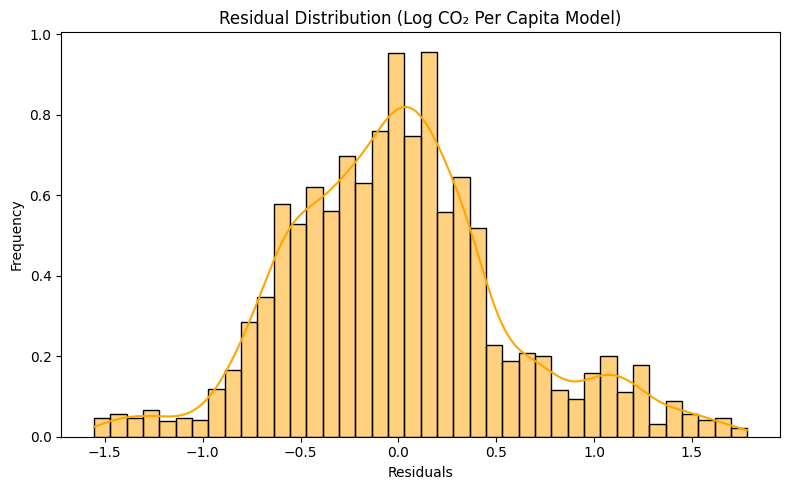

In [10]:
# Use log-transformed CO₂ per capita model for futher analysis

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd

# Prepare the data
df_log = df[['renewables_share_pct', 'log_co2_per_capita_t']].dropna()

# Fit the OLS regression model using log-transformed CO₂
log_model = smf.ols('log_co2_per_capita_t ~ renewables_share_pct', data=df_log).fit()

# Get the residuals from the model
residuals = log_model.resid

# Plot the residual distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color='orange', stat='density')
plt.title("Residual Distribution (Log CO₂ Per Capita Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**Interpretation of the Residue Distribution:**

- The residuals are approximately normally distributed, centered around zero, with mild right skew and no major outliers.

- The KDE curve closely follows a bell-shaped pattern, and the distribution shows a moderate peak with smoothly tapering tails, suggesting kurtosis near 3.

- Most values fall between –1.0 and +1.0, indicating stable model behavior.

The log transformation of CO₂ per capita improves the residual distribution by better satisfying regression assumptions, particularly normality.
This enhances the reliability of statistical inference and makes the model more suitable for interpreting percentage-based changes in emissions.

